<a href="https://colab.research.google.com/github/Iingxaki/team1_DS450-01_RH-JP/blob/Team-Mini-Project-CAPO-and-Time-to-Clinical-Stability/CAPO_and_TCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here the libraries pandas, and numpy anre imported to be able to handle the csv file and do changes to it.
Then from the library sklear.impute import SimpleImputer it is used to fill any missing categorical data.
Proceed to load the data set, filter the columns and drop the empty rows

Step 1: Data Cleaning and Preparation
Load the dataset and filter columns:

Keep only dem_, exam_, and cx_ columns.

Drop rows with excessive missing data or impute missing values where appropriate.

In [57]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Capstone 2025/Mini Projects/capo_data.csv')

In [58]:
data.head(5)

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,...,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
0,16,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0,0,1,1,1,1
1,17,60.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,18,45.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,0,0,0,0,0,0,0
3,19,35.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
4,20,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# prompt: help me calculate the number of empty values in each of the columns in percentage,
#dysplay all the columns with over 60% of the data missing

import pandas as pd

# Assuming 'data' is your pandas DataFrame

# Calculate the percentage of empty values in each column
missing_percentage = data.isnull().sum() * 100 / len(data)

# Filter and display columns with over 60% missing
columns_over_50_missing = missing_percentage[missing_percentage > 50]
print(columns_over_50_missing)

dem_pregnant         89.137303
dem_trimester        99.769137
exam_height          60.959903
exam_weight          59.866343
exam_rr              62.345079
exam_sbp             55.978129
exam_dbp             56.014581
exam_o2sat           54.714459
exam_o2satvalue      58.153098
exam_fio2            77.618469
lab_hematocrit       56.962333
lab_hemoglobin       59.562576
lab_bands            98.238153
lab_platelets        56.986634
lab_inr              98.359660
lab_na               56.913730
lab_k                57.132442
lab_bun              64.301337
lab_creatinine       57.448360
lab_bicarb           72.818955
lab_glucose          60.838396
lab_albumin          75.759417
lab_ast              92.758202
lab_alt              92.369380
lab_bilirubin        97.339004
lab_trop1            86.257594
lab_trop2            95.018226
lab_trop3            87.205346
lab_ckmb1            89.441069
lab_ckmb2            96.318348
lab_ckmb3            98.311057
lab_ldl              92.272175
lab_hdl 

In [60]:
# Drop the columns with over 60% missing values
data = data.drop(columns=columns_over_50_missing.index)

In [61]:
data.head()

,case_id,dem_age,dem_sex,exam_hr,exam_temp,exam_mental,lab_wbc,cx_rul,cx_rml,cx_rll,...,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
0,16,43.0,1.0,NaN,32.2,1.0,NaN,0.0,0.0,1.0,...,1,0,0,1,0,0,1,1,1,1
1,17,60.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,18,45.0,1.0,NaN,32.2,1.0,NaN,0.0,0.0,1.0,...,1,1,0,0,0,0,0,0,0,0
3,19,35.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
4,20,61.0,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Filter columns
selected_columns = [col for col in data.columns if 'dem_' in col or 'exam_' in col or 'cx_' in col]
data = data[selected_columns]

# Impute missing categorical values with the most frequent value
categorical_cols = data.select_dtypes(include=['object']).columns
# Check if there are any categorical columns before imputing
if len(categorical_cols) > 0:  # Only impute if there are categorical columns
    imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

# Impute missing numerical values with the mean
numerical_cols = data.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

data.head()

<ipython-input-62-fc539f6f67d8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = imputer.fit_transform(data[numerical_cols])


,dem_age,dem_sex,exam_hr,exam_temp,exam_mental,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe
0,43.0,1.0,99.321645,32.200000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,60.0,0.0,99.321645,37.382218,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,45.0,1.0,99.321645,32.200000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,35.0,0.0,99.321645,37.382218,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,61.0,0.0,99.321645,37.382218,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dem_age      8230 non-null   float64
 1   dem_sex      8230 non-null   float64
 2   exam_hr      8230 non-null   float64
 3   exam_temp    8230 non-null   float64
 4   exam_mental  8230 non-null   float64
 5   cx_rul       8230 non-null   float64
 6   cx_rml       8230 non-null   float64
 7   cx_rll       8230 non-null   float64
 8   cx_lul       8230 non-null   float64
 9   cx_lll       8230 non-null   float64
 10  cx_cav       8230 non-null   float64
 11  cx_pe        8230 non-null   float64
dtypes: float64(12)
memory usage: 771.7 KB


In [64]:
def calculate_tcs(row):
    # Check if criteria columns exist in the row before accessing them
    for day in range(1, 8):  # Move the 'for' loop outside
        criteria_cols = [f'criteria1_day{day}', f'criteria2_day{day}', f'criteria3_day{day}', f'criteria4_day{day}']
        if all(col in row.index for col in criteria_cols):  # Check if columns exist in the row
            if all(row[[f'criteria1_day{day}', f'criteria2_day{day}', f'criteria3_day{day}', f'criteria4_day{day}']] == 1):
                return day
    return 8  # Right-censored if not stable by day 7 or criteria columns are missing

# Apply the function to calculate TCS
# 'data' is the DataFrame, not 'selected_columns'
data['TCS'] = data.apply(calculate_tcs, axis=1)

Stable or not, early or late patient

In [65]:
data.head()

,dem_age,dem_sex,exam_hr,exam_temp,exam_mental,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,TCS
0,43.0,1.0,99.321645,32.200000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8
1,60.0,0.0,99.321645,37.382218,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8
2,45.0,1.0,99.321645,32.200000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8
3,35.0,0.0,99.321645,37.382218,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,8
4,61.0,0.0,99.321645,37.382218,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8


Step 2: Survival Analysis Curve
Use the lifelines library to generate a survival curve for TCS.

In [49]:
!pip install lifelines

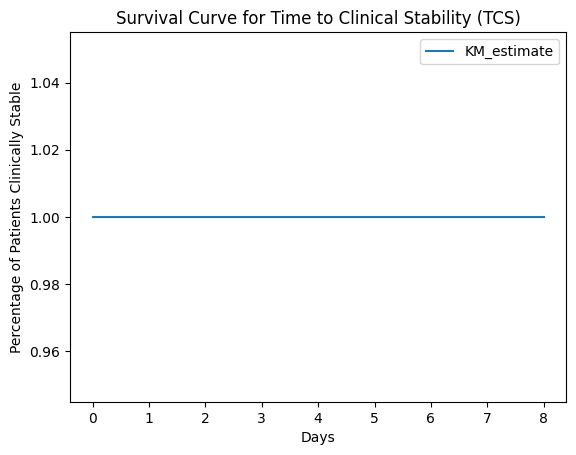

In [66]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model (TCS as event, no censoring since TCS=8 is already handled)
kmf.fit(data['TCS'], event_observed=(data['TCS'] != 8))

# Plot the survival curve
kmf.plot_survival_function()
plt.title('Survival Curve for Time to Clinical Stability (TCS)')
plt.xlabel('Days')
plt.ylabel('Percentage of Patients Clinically Stable')
plt.show()

Step 3: Linear Regression Model
Build a linear regression model to predict TCS.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Prepare features (X) and target (y)
X = data_filtered.drop(columns=['TCS'])
y = data_filtered['TCS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 1.0


Step 4: Logistic Regression Models
Binary Logistic Regression (Stable/Not Stable):

Create a binary target variable (1 if TCS ≤ 7, 0 if TCS = 8).

In [55]:
# Create binary target
data_filtered['Stable'] = (data_filtered['TCS'] <= 7).astype(int)

In [ ]:
# Check the unique values in your target variable
print(data_filtered['Stable'].unique())

In [53]:
# Create binary target
data_filtered['Stable'] = (data_filtered['TCS'] <= 7).astype(int)

# Check the unique values in your target variable
print(data_filtered['Stable'].unique())

# Prepare features (X) and target (y)
X = data_filtered.drop(columns=['TCS', 'Stable'])
y = data_filtered['Stable']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the unique values in the training target variable
print(y_train.unique())

# If only one class is present, handle the issue:
if len(y_train.unique()) < 2:
    print("Warning: Only one class present in the training target. Logistic Regression cannot be trained.")
    # Options to handle this:
    # 1. Collect more data to ensure both classes are represented.
    # 2. Consider a different modeling approach if collecting more data is not feasible.
else:
    # Train the model if there are at least two classes
    log_

[0]
[0]


Categorical Logistic Regression (Early/Late TCS):

Create a categorical target variable (1 if TCS < 4, 0 if TCS ≥ 4).

In [ ]:
# Create categorical target
data_filtered['Early_TCS'] = (data_filtered['TCS'] < 4).astype(int)

# Prepare features (X) and target (y)
X = data_filtered.drop(columns=['TCS', 'Stable', 'Early_TCS'])
y = data_filtered['Early_TCS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
log_model_early = LogisticRegression()
log_model_early.fit(X_train, y_train)

# Evaluate the model
y_pred = log_model_early.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

NameError: name 'data_filtered' is not defined

Step 5: Incorporate Lab Data
Add lab_ columns to the logistic regression models and evaluate performance.

In [ ]:
# Include lab data
lab_columns = [col for col in data.columns if col.startswith('lab_')]
data_with_labs = pd.concat([data_filtered, data[lab_columns]], axis=1)

# Repeat logistic regression steps with lab data included

Deliverables:
Notebook/Script:

Document each step with Markdown explanations.

Include interpretations of model performance (e.g., R2, accuracy, classification reports).

Video Presentation:

Use a narrated PowerPoint to explain the project.

Include all team members and a link to the video in the README.md.

Cleaned Dataset:

Save the cleaned dataset as cleaned_cap_data.csv.